# Changing the architecture and plotting MSE

In [82]:
import pandas as pd
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from fcnn import *

data = pd.read_csv(r'Group24\Group24\Regression\BivariateData\24.csv', names=['x', 'y', 'z'])
target_output = data.z
data = data.drop(columns=['z'])

X_train, X_test, y_train, y_test = train_test_split(data, target_output, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

rec = {}

for eta in [0.1,0.01]:
    rec2 = {"train" : [], "val" : [], "test" : []}
    for neurons in [5,6,7,8,9,10,11,12]:

        FCNN = Model(0.1,"regression")
        nodes_hidden_layer1 = neurons
        nodes_hidden_layer2 = neurons
        FCNN.add_layer(2)
        FCNN.add_layer(nodes_hidden_layer1)
        FCNN.add_layer(nodes_hidden_layer2)
        FCNN.add_layer(1)


        errors = []
        previous_validation_error = 100
        inc_val_er_streak = 0
        while True:
            FCNN.fit(X_train.to_numpy(), y_train.to_numpy().reshape(len(y_train),1))
            errors.append(FCNN.avg_training_error())
            if(len(errors)>1 and abs(errors[len(errors)-1]-errors[len(errors)-2])<0.0001): break

            # Computing the validation error
            prediction = FCNN.classify_batch(X_val.to_numpy())
            current_validation_error = mean_squared_error(y_val, prediction)
            if(previous_validation_error < current_validation_error): 
                inc_val_er_streak += 1
                if(inc_val_er_streak >= 3): break
            inc_val_er_streak = 0        
            previous_validation_error = current_validation_error
            FCNN.total_error = []

        print("\n", "eta = {}, layer = {}".format(eta, neurons))

        # %%
        # Classification of validation data
        val_mse = 0
        predicted_val = FCNN.classify_batch(X_val.to_numpy())

        # Mean squared error
        val_mse = mean_squared_error(y_val, predicted_val)
        print("MSE (Validation data) = ", val_mse)

        # %%
        # Classification of training data
        train_mse = 0
        predicted_train = FCNN.classify_batch(X_train.to_numpy())

        # Mean squared error
        train_mse = mean_squared_error(y_train, predicted_train)
        print("MSE (training data) = ", train_mse)

        #%%
        test_mse = 0
        # Classification of testing data
        predicted_test = FCNN.classify_batch(X_test.to_numpy())

        # Mean squared error
        test_mse = mean_squared_error(y_test, predicted_test)
        print("MSE (testing data) = ", test_mse)
        # %%

        rec2["train"].append(train_mse)
        rec2["val"].append(val_mse)
        rec2["test"].append(test_mse)
    rec[eta] = rec2


 eta = 0.1, layer = 5
MSE (Validation data) =  0.010622340511259454
MSE (training data) =  0.010185060111244737
MSE (testing data) =  0.010028423469584746

 eta = 0.1, layer = 6
MSE (Validation data) =  0.010361180619198388
MSE (training data) =  0.010273279562492603
MSE (testing data) =  0.010150902696096004

 eta = 0.1, layer = 7
MSE (Validation data) =  0.01134661069326721
MSE (training data) =  0.011658734028190709
MSE (testing data) =  0.011442250925530424

 eta = 0.1, layer = 8
MSE (Validation data) =  0.011466347989571763
MSE (training data) =  0.011570593556379679
MSE (testing data) =  0.01143236908789521

 eta = 0.1, layer = 9
MSE (Validation data) =  0.006957093255723698
MSE (training data) =  0.0069277432647519305
MSE (testing data) =  0.0069338511275314416

 eta = 0.1, layer = 10
MSE (Validation data) =  0.00580423472164028
MSE (training data) =  0.005675401279342756
MSE (testing data) =  0.005617353069099709

 eta = 0.1, layer = 11
MSE (Validation data) =  0.5511611005132

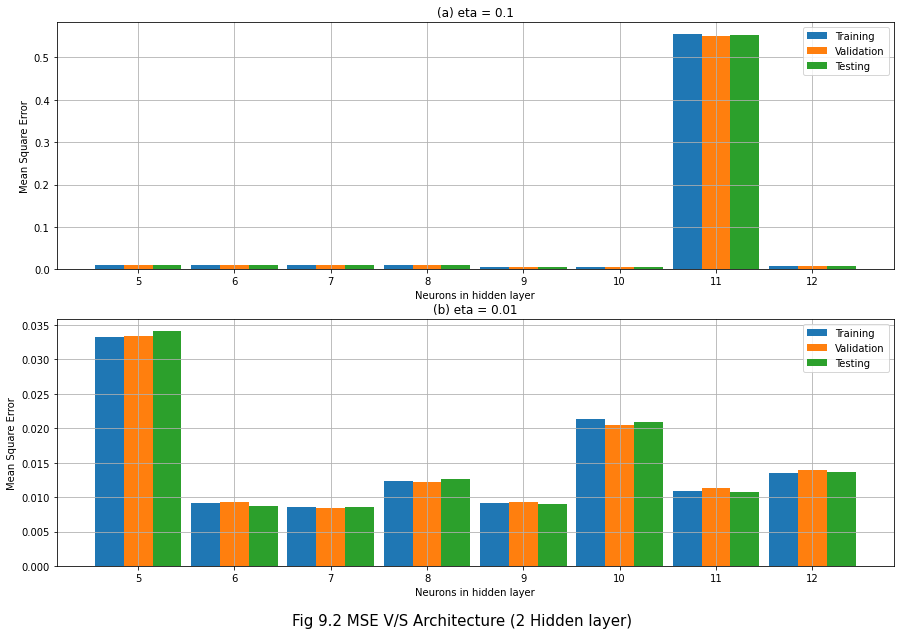

In [84]:
X = ['5', '6', '7', '8', '9', '10', '11', '12']
plt.figure(figsize = (15,10))
plt.suptitle("Fig 9.2 MSE V/S Architecture (2 Hidden layer)", y=0.06, fontsize=15)
train = rec[0.1]["train"]
val = rec[0.1]["val"]
test = rec[0.1]["test"]
  
X_axis = np.arange(len(X))
plt.subplot(2, 1, 1)
plt.bar(X_axis - 0.3, train, 0.3, label = 'Training')
plt.bar(X_axis , val, 0.3, label = 'Validation')
plt.bar(X_axis + 0.3, test, 0.3, label = 'Testing')
  
plt.xticks(X_axis, X)
plt.xlabel("Neurons in hidden layer")
plt.ylabel("Mean Square Error")
plt.title("(a) eta = 0.1")
plt.legend()
plt.grid(True)

train = rec[0.01]["train"]
val = rec[0.01]["val"]
test = rec[0.01]["test"]
  
X_axis = np.arange(len(X))
plt.subplot(2, 1, 2)
plt.bar(X_axis - 0.3, train, 0.3, label = 'Training')
plt.bar(X_axis , val, 0.3, label = 'Validation')
plt.bar(X_axis + 0.3, test, 0.3, label = 'Testing')
  
plt.xticks(X_axis, X)
plt.xlabel("Neurons in hidden layer")
plt.ylabel("Mean Square Error")
plt.title("(b) eta = 0.01")
plt.legend()
plt.grid(True)
plt.show()

# Plotting model output and target output

In [71]:
# %%
import pandas as pd
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from fcnn import *

data = pd.read_csv(r'Group24\Group24\Regression\BivariateData\24.csv', names=['x', 'y', 'z'])
target_output = data.z
data = data.drop(columns=['z'])

X_train, X_test, y_train, y_test = train_test_split(data, target_output, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# %%

FCNN = Model(0.1,"regression")
nodes_hidden_layer1 = 6
nodes_hidden_layer2 = 6
FCNN.add_layer(2)
FCNN.add_layer(nodes_hidden_layer1)
FCNN.add_layer(nodes_hidden_layer2)
FCNN.add_layer(1)

errors = []
previous_validation_error = 100
inc_val_er_streak = 0
while True:
    FCNN.fit(X_train.to_numpy(), y_train.to_numpy().reshape(len(y_train),1))
    errors.append(FCNN.avg_training_error())
    if(len(errors)>1 and abs(errors[len(errors)-1]-errors[len(errors)-2])<0.0001): break

    # Computing the validation error
    prediction = FCNN.classify_batch(X_val.to_numpy())
    current_validation_error = mean_squared_error(y_val, prediction)
    if(previous_validation_error < current_validation_error): 
        inc_val_er_streak += 1
        if(inc_val_er_streak >= 3): break
    inc_val_er_streak = 0        
    previous_validation_error = current_validation_error
    FCNN.total_error = []

# %%
# Classification of validation data
val_mse = 0
predicted_val = FCNN.classify_batch(X_val.to_numpy())

# Mean squared error
val_mse = mean_squared_error(y_val, predicted_val)
print("MSE (Validation data) = ", val_mse)

# %%
# Classification of training data
train_mse = 0
predicted_train = FCNN.classify_batch(X_train.to_numpy())

# Mean squared error
train_mse = mean_squared_error(y_train, predicted_train)
print("MSE (training data) = ", train_mse)

#%%
test_mse = 0
# Classification of testing data
predicted_test = FCNN.classify_batch(X_test.to_numpy())

# Mean squared error
test_mse = mean_squared_error(y_test, predicted_test)
print("MSE (testing data) = ", test_mse)
# %%


MSE (Validation data) =  0.007066427352877023
MSE (training data) =  0.007175991257550112
MSE (testing data) =  0.007021781585315631


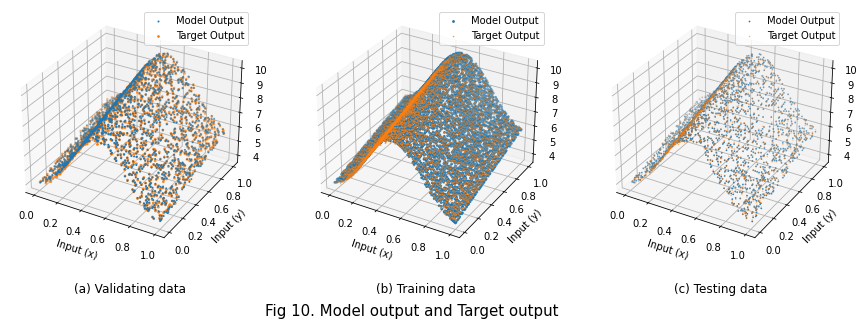

In [67]:
# Model output and target output for validation data
fig = plt.figure(figsize=(15, 5))
fig.suptitle('Fig 10. Model output and Target output', y=0.02, fontsize=15)

ax = fig.add_subplot(1, 3, 1, projection='3d', frame_on=True)
# ax.scatter3D(X_val.x, X_val.y, neuron_activation_value)
ax.scatter3D(X_val.x, X_val.y, predicted_val, cmap='Greens', s=1)
ax.scatter3D(X_val.x, X_val.y, y_val, cmap='Greens', s=3)
plt.xlabel("Input (x)")
plt.ylabel("Input (y)")
plt.title("(a) Validating data", y=-0.2)
plt.legend(['Model Output', 'Target Output'])

# Model output and target output for training data
ax = fig.add_subplot(1, 3, 2, projection='3d', frame_on=True)
ax.scatter3D(X_train.x, X_train.y, predicted_train, cmap='Greens', s=3)
ax.scatter3D(X_train.x, X_train.y, y_train, cmap='Greens', s=0.2)
plt.xlabel("Input (x)")
plt.ylabel("Input (y)")
plt.title("(b) Training data", y=-0.2)
plt.legend(['Model Output', 'Target Output'])

# Model output and target output for testing data
ax = fig.add_subplot(1, 3, 3, projection='3d', frame_on=True)
ax.scatter3D(X_test.x, X_test.y, predicted_test, cmap='Greens', s=0.5)
ax.scatter3D(X_test.x, X_test.y, y_test, cmap='Greens', s=0.1)
plt.xlabel("Input (x)")
plt.ylabel("Input (y)")
plt.title("(c) Testing data", y=-0.2)
plt.legend(['Model Output', 'Target Output'])
plt.show()

# Target output VS model output

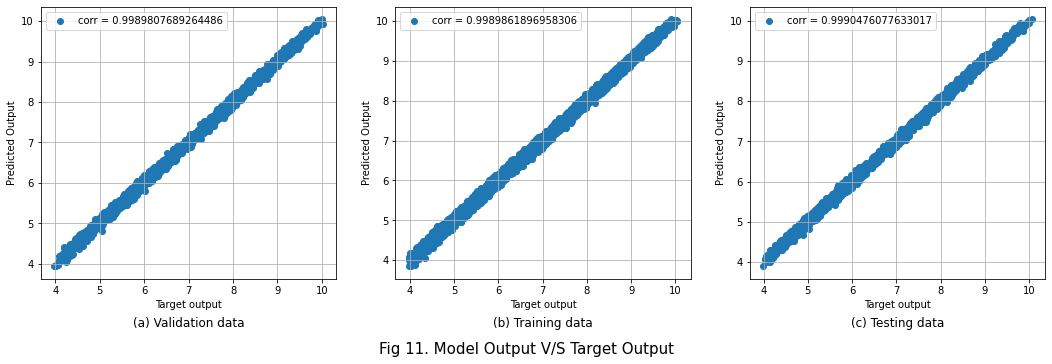

In [68]:

# Model output and target output for validation data
plt.figure(figsize=(18,5))
plt.suptitle("Fig 11. Model Output V/S Target Output",y=-0.05, fontsize=15)

plt.subplot(1,3,1)
plt.scatter(y_val, predicted_val)
plt.xlabel("Target output")
plt.ylabel("Predicted Output")
plt.title("(a) Validation data",y=-0.2)
plt.legend(["corr = {}".format(np.corrcoef(y_val,predicted_val)[0][1])])
plt.grid(True)

# Target output vs model output for training data
plt.subplot(1,3,2)
plt.scatter(y_train, predicted_train)
plt.xlabel("Target output")
plt.ylabel("Predicted Output")
plt.title("(b) Training data",y=-0.2)
plt.legend(["corr = {}".format(np.corrcoef(y_train,predicted_train)[0][1])])
plt.grid(True)

# Target output vs model output for testing data
plt.subplot(1,3,3)
plt.scatter(y_test, predicted_test)
plt.xlabel("Target output")
plt.ylabel("Predicted Output")
plt.title("(c) Testing data",y=-0.2)
plt.legend(["corr = {}".format(np.corrcoef(y_test,predicted_test)[0][1])])
plt.grid(True)
plt.show()


# Hidden layers plots

#### Plotting for validation set

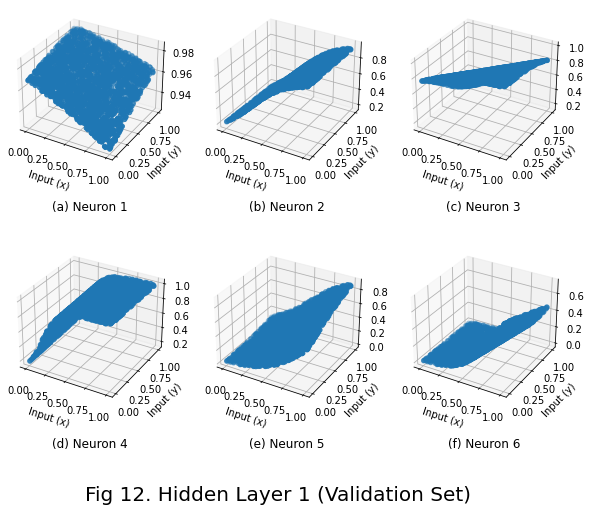

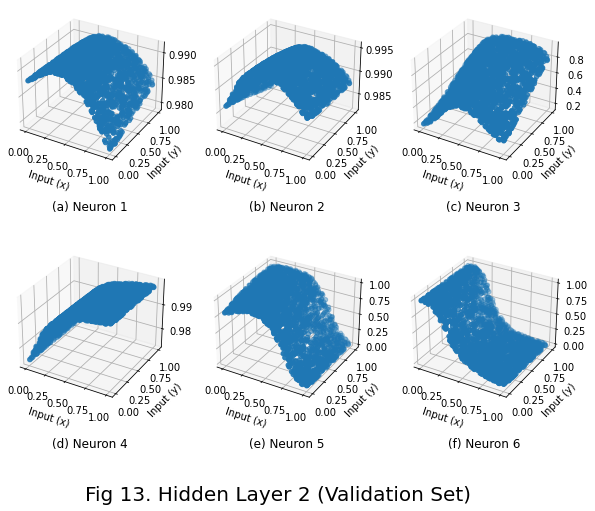

In [75]:
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Fig 12. Hidden Layer 1 (Validation Set)', y=0.02, fontsize=20)

for l in range(1,nodes_hidden_layer1+1):
    neuron_activation_value = []
    for i in range(X_val.shape[0]):
        neuron_activation_value.append(FCNN.classify_point(X_val.iloc[i].to_numpy())[1][1].gn[l])
        FCNN.clean_layers()

    ax = fig.add_subplot(2, 3, l, projection='3d', frame_on=True)
    ax.scatter3D(X_val.x, X_val.y, neuron_activation_value)

    plt.xlabel("Input (x)")
    plt.ylabel("Input (y)")
    plt.title("({}) Neuron {}".format(chr(96+l),l), y=-0.3)

plt.show()

#%%
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Fig 13. Hidden Layer 2 (Validation Set)', y=0.02, fontsize=20)
for l in range(1,nodes_hidden_layer2+1):
    neuron_activation_value = []
    for i in range(X_val.shape[0]):
        neuron_activation_value.append(FCNN.classify_point(X_val.iloc[i].to_numpy())[1][2].gn[l])
        FCNN.clean_layers()

    ax = fig.add_subplot(2, 3, l, projection='3d', frame_on=True)
    ax.scatter3D(X_val.x, X_val.y, neuron_activation_value)

    plt.xlabel("Input (x)")
    plt.ylabel("Input (y)")
    plt.title("({}) Neuron {}".format(chr(96+l),l), y=-0.3)

plt.show()


#### Plotting for training set

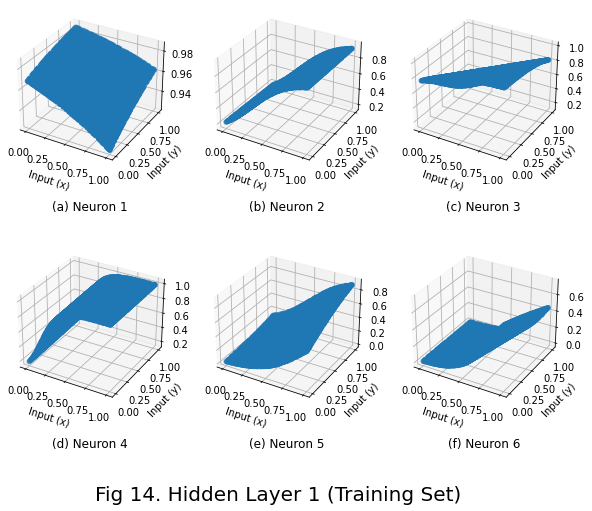

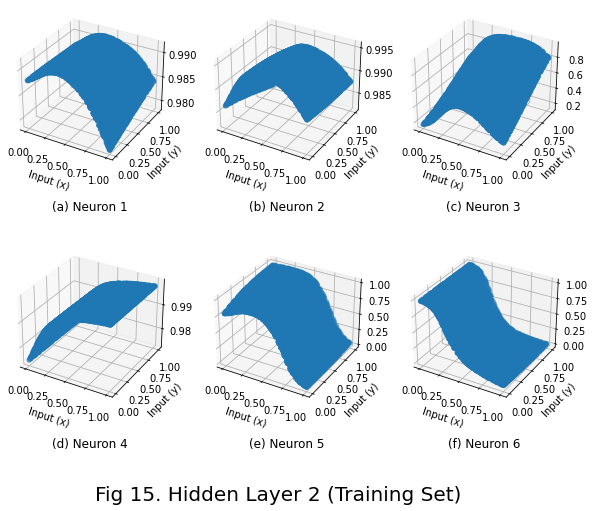

In [78]:
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Fig 14. Hidden Layer 1 (Training Set)', y=0.02, fontsize=20)

for l in range(1,nodes_hidden_layer1+1):
    neuron_activation_value = []
    for i in range(X_train.shape[0]):
        neuron_activation_value.append(FCNN.classify_point(X_train.iloc[i].to_numpy())[1][1].gn[l])
        FCNN.clean_layers()

    ax = fig.add_subplot(2, 3, l, projection='3d', frame_on=True)
    ax.scatter3D(X_train.x, X_train.y, neuron_activation_value)

    plt.xlabel("Input (x)")
    plt.ylabel("Input (y)")
    plt.title("({}) Neuron {}".format(chr(96+l),l), y=-0.3)

plt.show()

#%%
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Fig 15. Hidden Layer 2 (Training Set)', y=0.02, fontsize=20)
for l in range(1,nodes_hidden_layer2+1):
    neuron_activation_value = []
    for i in range(X_train.shape[0]):
        neuron_activation_value.append(FCNN.classify_point(X_train.iloc[i].to_numpy())[1][2].gn[l])
        FCNN.clean_layers()

    ax = fig.add_subplot(2, 3, l, projection='3d', frame_on=True)
    ax.scatter3D(X_train.x, X_train.y, neuron_activation_value)

    plt.xlabel("Input (x)")
    plt.ylabel("Input (y)")
    plt.title("({}) Neuron {}".format(chr(96+l),l), y=-0.3)

plt.show()

#### Plotting for testing set

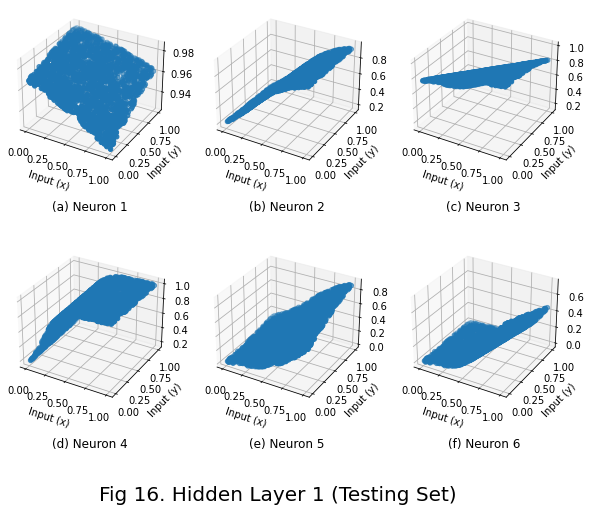

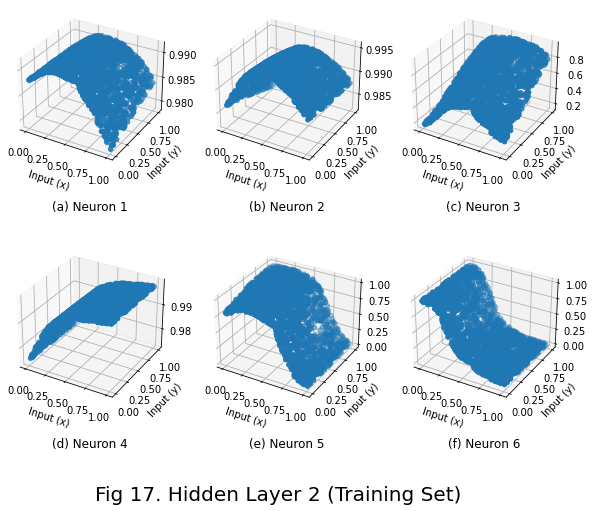

In [79]:
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Fig 16. Hidden Layer 1 (Testing Set)', y=0.02, fontsize=20)

for l in range(1,nodes_hidden_layer1+1):
    neuron_activation_value = []
    for i in range(X_test.shape[0]):
        neuron_activation_value.append(FCNN.classify_point(X_test.iloc[i].to_numpy())[1][1].gn[l])
        FCNN.clean_layers()

    ax = fig.add_subplot(2, 3, l, projection='3d', frame_on=True)
    ax.scatter3D(X_test.x, X_test.y, neuron_activation_value)

    plt.xlabel("Input (x)")
    plt.ylabel("Input (y)")
    plt.title("({}) Neuron {}".format(chr(96+l),l), y=-0.3)

plt.show()

#%%
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Fig 17. Hidden Layer 2 (Training Set)', y=0.02, fontsize=20)
for l in range(1,nodes_hidden_layer2+1):
    neuron_activation_value = []
    for i in range(X_test.shape[0]):
        neuron_activation_value.append(FCNN.classify_point(X_test.iloc[i].to_numpy())[1][2].gn[l])
        FCNN.clean_layers()

    ax = fig.add_subplot(2, 3, l, projection='3d', frame_on=True)
    ax.scatter3D(X_test.x, X_test.y, neuron_activation_value)

    plt.xlabel("Input (x)")
    plt.ylabel("Input (y)")
    plt.title("({}) Neuron {}".format(chr(96+l),l), y=-0.3)

plt.show()